<a href="https://colab.research.google.com/github/CREVIOS/SSI_2020/blob/master/Lecture_5_3_Clustering_%5BSOLUTION%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codealong - Clustering

In this codealong, you will be getting your first taste of clustering, a form of unsupervised learning!

## 1. Load a 2d dataset

Run the following cells to setup our imports and load the simulated, 2d dataset that we're going to use to practice clustering.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.cluster
import sklearn.metrics
import sklearn.datasets

In [ ]:
X, y = sklearn.datasets.make_blobs(n_samples=100, n_features=4, centers=4, random_state=13)
print(X.shape)
display(pd.DataFrame(X, columns=["X1", "X2", "X3", "X4"]))

(100, 4)


,X1,X2,X3,X4
0,9.146841,-0.889568,1.113886,8.911636
1,2.813845,4.548039,-9.455069,-5.494488
2,8.607546,-1.447458,-0.026018,5.107401
3,3.099877,5.318824,-9.631679,-1.938842
4,3.273074,2.628340,-8.303060,-4.080963
...,...,...,...,...
95,2.641771,5.112637,-10.098957,-4.875703
96,9.812054,-1.369216,2.409184,4.835155
97,8.916839,-0.062638,2.253840,5.270470
98,2.447418,2.889408,-11.020065,-4.013028


## 2. Plot dataset

Write code to plot the dataset we just loaded in!

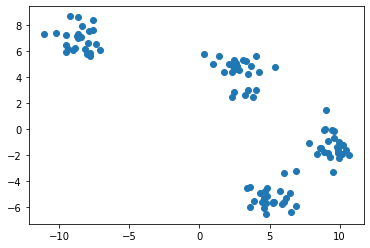

In [ ]:
# TODO : Plot the dataset
plt.figure()
plt.scatter(X[:,0], X[:, 1])
plt.show()

## 3. Use sklearn's kmeans class different times to get different answers

Write code using the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to create a clustering model, fit it to our data, and predict the clusters.

Run it several times, changing the amount of clusters every time!

In [ ]:
# TODO: Create and fit your model
kmeans = sklearn.cluster.KMeans(n_clusters=7, random_state=0)
kmeans.fit(X) # note, only X! No y values to fit to.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# TODO: Write your prediction code
labels = kmeans.predict(X)
print(labels)

[0 2 0 2 4 6 2 0 2 0 2 6 0 4 1 1 3 0 6 0 5 2 3 5 1 1 3 2 0 0 2 0 6 2 5 5 0
 4 1 2 1 2 3 0 1 0 6 2 4 6 0 4 5 1 0 3 6 0 2 1 0 4 6 6 5 1 2 0 5 6 5 1 5 1
 5 2 6 1 6 3 0 0 3 0 6 6 3 6 2 3 0 6 5 2 0 2 0 0 2 1]


## 4. Visualize several of them!

Write code to visualize your clusters, and run it several times with different amounts of clusters!

*Hint: Call `plt.scatter` just like we did before, but pass in a value for the parameter `c` (which represents the color)*

[]

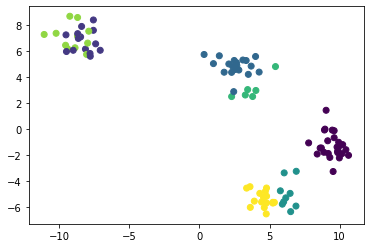

In [ ]:
# TODO: Visualize your clusters!
plt.scatter(X[:,0], X[:,1], c=labels)
plt.plot()

# Codealong - Selecting k

Use the technique from the slide deck to find the best k!

## 1. Find the best WCSS for each k from 2 to 10 (inclusive)

In [ ]:
# TODO: Find the best WCSS for each value of k from 2 to 10 (inclusive)
MAX_CLUSTERS = 10
M = 5
best_sum_squares = []
RANGE_CLUSTERS = range(2, MAX_CLUSTERS + 1)
for k in RANGE_CLUSTERS:
  sum_squares_k = []
  for i in range(M):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=i)
    kmeans.fit(X)
    wcss = kmeans.inertia_
    sum_squares_k.append(wcss)
  best_wcss_for_k = np.min(sum_squares_k)
  best_sum_squares.append(best_wcss_for_k)


## 2. Plot these WCSS values

Plot a figure with k values on the x-axis and the WCSS on the y-axis.

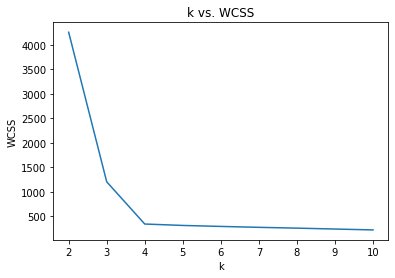

In [ ]:
# TODO: Plot WCSS against k
plt.figure()
plt.plot(RANGE_CLUSTERS, best_sum_squares)
plt.title("k vs. WCSS")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.show()

## 3. Select the best k with the elbow method!

Looking at your plot, using the elbow method, which k is the best value? Does this make sense with what we can guess intuitively? 

We will code up kmeans from scratch! (Optional) Try running it many times! It also prints the plots at each step so you can see what happens :)

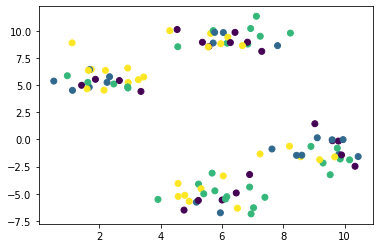

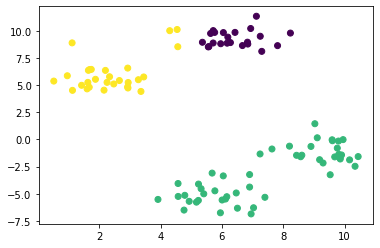

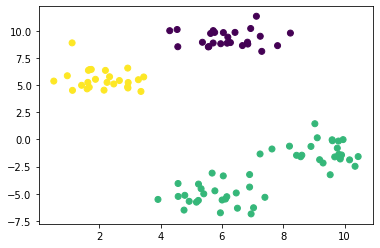

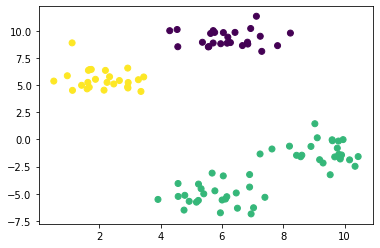

In [ ]:
class KMeans2:
  def __init__(self, k):
    # the number of clusters
    self.k = k
  
  def fit(self, X):
    """
    Take in an n x d matrix X, and return an 1-dimensional y vector (with size n)
    so that y[i] is the cluster assignment of ith data point.

    k is the number of clusters
    """
    n, d = X.shape
    y = np.random.randint(low=0, high=self.k, size=n) # randomly 0,1,..,k-1 to each of n points
    cluster_centers = np.zeros((self.k, d)) # k x d matrix. for each of k clusters, we have a d-dim center

    while True: # TODO: placeholder or break somewhere
      plt.figure()
      plt.scatter(X[:,0], X[:, 1], c=y)
      plt.show()
      # print("Here")
      new_cluster_centers = np.zeros((self.k, d))
      # recompute cluster means
      counts = np.zeros(self.k) # number of data in each cluster
      for i in range(n): # loop through all data points
        point = X[i, :] # current d-dimensional data point
        label = y[i] # current label for that point
        new_cluster_centers[label] += point # adding a d-dimensional vector
        counts[label] += 1
      
      # Currently have cluster "sums" not averages
      for i in range(self.k):
        new_cluster_centers[i, :] /= (counts[i] + 0.0001) # may divide by 0 :( without

      # reassign points to closest cluster means
      y_new = np.zeros(n)
      for i in range(n): # loop through data
        dists = np.zeros(self.k) # dist to each of the k clusters
        # Compute distance to each cluster
        for j in range(self.k): # loop through clusters
          dists[j] = np.linalg.norm(X[i,:] - new_cluster_centers[j,:]) # ith data point X[i,:], compare to jth cluster
        best_cluster = np.argmin(dists) # index of the best dist
        y_new[i] = best_cluster
      
      y_new = y_new.astype(int)


      if np.all(y_new == y):
        self.y = y
        break
      y = y_new
      cluster_centers = new_cluster_centers
      
    

  def predict(self):
    return self.y
  
kmeans2 = KMeans2(4)
kmeans2.fit(X)
labels = kmeans2.predict()
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=labels)
plt.show()